# Задание 1. A/B тестирование

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency, chi2
from scipy import stats
import statsmodels.api as sm

sns.set(rc={'figure.figsize': (12, 6)}, style='whitegrid')

In [2]:
url = 'https://drive.google.com/uc?id='
url_1 = 'https://drive.google.com/file/d/1GKb-CVLKeTIPYfhNr1cBjoUpitvzK2Th/view?usp=sharing'
url_2 = 'https://drive.google.com/file/d/1AeK9wSA7K8vY8Pzg5D2osauFlB5N8jVh/view?usp=sharing'
url_3 = 'https://drive.google.com/file/d/1hSd-dG5Lk_V4ZNTO19NOotRSq9AQ6aXM/view?usp=sharing'
url_4 = 'https://drive.google.com/file/d/1_kcg4bcK7VfpuA3LyO-1Fz0LYPnBOPAc/view?usp=sharing'

path_1 = url + url_1.split('/')[-2]
path_2 = url + url_2.split('/')[-2]
path_3 = url + url_3.split('/')[-2]
path_4 = url + url_4.split('/')[-2]

df_groups = pd.read_csv(path_1, sep=';')
df_group_add = pd.read_csv(path_2)
df_active_studs = pd.read_csv(path_3)
df_checks = pd.read_csv(path_4, sep=';')

In [3]:
df_groups.head()

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A


In [4]:
df_groups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74484 entries, 0 to 74483
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      74484 non-null  int64 
 1   grp     74484 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [5]:
df_groups.duplicated().sum()

0

In [6]:
df_groups.isna().sum()

id     0
grp    0
dtype: int64

In [7]:
df_groups.dtypes

id      int64
grp    object
dtype: object

In [8]:
df_groups.nunique()

id     74484
grp        2
dtype: int64

In [9]:
df_group_add.head()

,id,grp
0,5694584,B
1,5694830,B
2,5695057,B
3,5698872,B
4,5699067,B


In [10]:
df_group_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      92 non-null     int64 
 1   grp     92 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [11]:
df_group_add.duplicated().sum()

0

In [12]:
df_group_add.isna().sum()

id     0
grp    0
dtype: int64

In [13]:
df_group_add.nunique()

id     92
grp     2
dtype: int64

In [14]:
df_active_studs.head()

,student_id
0,581585
1,5723133
2,3276743
3,4238589
4,4475369


In [15]:
df_active_studs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8341 entries, 0 to 8340
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   student_id  8341 non-null   int64
dtypes: int64(1)
memory usage: 65.3 KB


In [16]:
df_active_studs.duplicated().sum()

0

In [17]:
df_active_studs.isna().sum()

student_id    0
dtype: int64

In [18]:
df_checks.head()

,student_id,rev
0,1627,990.0
1,3185,690.0
2,25973,690.0
3,26280,690.0
4,100300,990.0


In [19]:
df_checks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  541 non-null    int64  
 1   rev         541 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.6 KB


In [20]:
df_checks.duplicated().sum()

0

In [21]:
df_checks.isna().sum()

student_id    0
rev           0
dtype: int64

In [22]:
df_checks.nunique()

student_id    541
rev            39
dtype: int64

*Объединяем датафрейм с информацией о принадлежности пользователей к контрольной или экспериментальной группам с дополнительным файлом о пользователях*

In [23]:
df_groups = df_groups.append(df_group_add)

In [24]:
df_groups.head()

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A


In [25]:
df_groups.shape

(74576, 2)

In [26]:
df_groups.duplicated().sum()

0

*Объединим файл с распределением по группам с файлом активных пользователей и файлом покупок пользователей. Для удобства объединения переименуем столбец "student_id".* 

In [27]:
df_checks.rename(columns={'student_id': 'id'}, inplace=True)

In [28]:
df_groups = df_groups \
    .merge(df_active_studs, left_on='id', right_on='student_id', how='left') \
    .merge(df_checks, on='id', how='left')

In [29]:
df_groups.isna().sum()

id                0
grp               0
student_id    66235
rev           74035
dtype: int64

*Заполним пропущенные значения нулями*

In [30]:
df_groups.fillna(0, inplace=True)

In [31]:
df_groups.head()

,id,grp,student_id,rev
0,1489,B,0.0,0.0
1,1627,A,1627.0,990.0
2,1768,B,0.0,0.0
3,1783,B,0.0,0.0
4,1794,A,0.0,0.0


Добавим в датафрейм колонку, обозначающую активных и неактивных пользователей

In [32]:
df_groups['is_active'] = df_groups.student_id.apply(lambda x: 'active' if x != 0 else 'not active')

In [33]:
df_groups.drop(columns=['student_id'], inplace=True)

In [34]:
df_groups.head()

,id,grp,rev,is_active
0,1489,B,0.0,not active
1,1627,A,990.0,active
2,1768,B,0.0,not active
3,1783,B,0.0,not active
4,1794,A,0.0,not active


In [35]:
df_groups.is_active.value_counts()

not active    66235
active         8341
Name: is_active, dtype: int64

In [36]:
df_groups.grp.value_counts()

B    59883
A    14693
Name: grp, dtype: int64

## Расчет метрик

При анализе результатов эксперимента рассчитаем следующие метрики: 
* ARPU пользователя
* ARPPU пользователя
* ARPU активного пользователя
* ARPPU активного пользователя
* CR пользователя
* CR активного пользователя

Средний доход с пользователя (ARPU)

In [37]:
ARPU = df_groups \
    .groupby('grp', as_index=False) \
    .agg({'rev': 'mean'}) \
    .rename(columns={'rev': 'ARPU'})
ARPU

,grp,ARPU
0,A,6.268019
1,B,8.036171


Средний доход с платящего пользователя

In [38]:
ARPPU = df_groups \
    .query('rev != 0') \
    .groupby('grp', as_index=False) \
    .agg({'rev': 'mean'}) \
    .rename(columns={'rev': 'ARPPU'})
ARPPU

,grp,ARPPU
0,A,860.710280
1,B,1108.824893


Медианный доход с платящего пользователя

In [39]:
df_groups \
    .query('rev != 0') \
    .groupby('grp', as_index=False) \
    .agg({'rev': 'median'})

,grp,rev
0,A,690.0
1,B,935.0


Средний доход с активного пользователя (ARPU)

In [40]:
ARPU_active = df_groups[df_groups.is_active == 'active'] \
    .groupby('grp', as_index=False) \
    .agg({'rev': 'mean'}) \
    .rename(columns={'rev': 'ARPU_active'})
ARPU_active

,grp,ARPU_active
0,A,47.347204
1,B,58.058798


Средний доход с активного платящего пользователя (ARPAU) 

In [41]:
ARPPU_active = df_groups[df_groups.is_active == 'active'] \
    .query('rev != 0') \
    .groupby('grp', as_index=False) \
    .agg({'rev': 'mean'}) \
    .rename(columns={'rev': 'ARPPU_active'})
ARPPU_active

,grp,ARPPU_active
0,A,933.589744
1,B,1257.878992


Медианный доход с активного платящего пользователя

In [42]:
df_groups[df_groups.is_active == 'active'] \
    .query('rev != 0') \
    .groupby('grp', as_index=False) \
    .agg({'rev': 'median'})

,grp,rev
0,A,585.0
1,B,1140.0


In [43]:
metrics_df = ARPU.merge(ARPPU, on='grp').merge(ARPU_active, on='grp').merge(ARPPU_active, on='grp')
metrics_df

,grp,ARPU,ARPPU,ARPU_active,ARPPU_active
0,A,6.268019,860.710280,47.347204,933.589744
1,B,8.036171,1108.824893,58.058798,1257.878992


Для удобства сформируеи датафреймы по группам пользователей

In [44]:
control_group_active = df_groups[(df_groups.grp == 'A') & (df_groups.is_active == 'active')]
experimental_group_active = df_groups[(df_groups.grp == 'B') & (df_groups.is_active == 'active')]
control_group_not_active = df_groups[(df_groups.grp == 'A') & (df_groups.is_active == 'not active')]
experimental_group_not_active = df_groups[(df_groups.grp == 'B') & (df_groups.is_active == 'not active')]

control_group = df_groups[(df_groups.grp == 'A')]
experimental_group = df_groups[(df_groups.grp == 'B')]

CR пользователей в контрольной группе

In [45]:
CR_A = control_group.query('rev != 0').id.count() / control_group.id.count() * 100
CR_A

0.7282379364323147

CR пользователей в экспериментальной групп

In [46]:
CR_B = experimental_group.query('rev != 0').id.count() / experimental_group.id.count() * 100
CR_B

0.7247465891822387

CR активных пользователей в контрольной группе

In [47]:
CR_A_active = control_group_active.query('rev != 0').id.count() / control_group_active.id.count() * 100
CR_A_active

5.071521456436931

CR активных пользователей в экспериментальной группе

In [48]:
CR_B_active = experimental_group_active.query('rev != 0').id.count() / experimental_group_active.id.count() * 100
CR_B_active

4.615610759958842

*CR пользователей (без разбивки по активности) в контрольной и экспериментальной группах, почти не различаются. То есть применение новой схемы оплат не привело к увеличению конверсии, более того, CR активных пользователей в экспериментальной группе снизился по сравнению с пользователями группы А.*

In [49]:
metrics_df['CR'] = [CR_A, CR_B]

In [50]:
metrics_df['CR_active'] = [CR_A_active, CR_B_active]

In [51]:
control_group_not_active.query('rev != 0').id.count() / control_group_not_active.id.count() * 100

0.22044849866970734

In [52]:
experimental_group_not_active.query('rev != 0').id.count() / experimental_group_not_active.id.count() * 100

0.22607385079125847

In [53]:
metrics_df

,grp,ARPU,ARPPU,ARPU_active,ARPPU_active,CR,CR_active
0,A,6.268019,860.710280,47.347204,933.589744,0.728238,5.071521
1,B,8.036171,1108.824893,58.058798,1257.878992,0.724747,4.615611


## Статистика

Определим наличие взаимосвязи между двумя номинативными переменными: распределение по группам пользователей (A или B) и активностью пользователей, при помощи теста хи-квадрата Пирсона.

Все пользователи

In [54]:
pd.crosstab(df_groups.grp, df_groups.is_active)

is_active,active,not active
grp,,
A,1538,13155
B,6803,53080


In [55]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(df_groups.grp, 
                                                      df_groups.is_active))

In [56]:
print('Statistics=%.2f, p=%.9f, dof=%.0f \nExpected:' % (stat, p, dof), expected)

Statistics=9.38, p=0.002193805, dof=1 
Expected: [[ 1643.34790013 13049.65209987]
 [ 6697.65209987 53185.34790013]]


Только платящие пользователи

In [57]:
pd.crosstab(df_groups.query('rev != 0').grp, df_groups.query('rev != 0').is_active)

is_active,active,not active
grp,,
A,78,29
B,314,120


In [58]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(df_groups.query('rev != 0').grp, 
                                                      df_groups.query('rev != 0').is_active))

In [59]:
print('Statistics=%.2f, p=%.9f, dof=%.0f \nExpected:' % (stat, p, dof), expected)

Statistics=0.00, p=1.000000000, dof=1 
Expected: [[ 77.53049908  29.46950092]
 [314.46950092 119.53049908]]


*В результате тестирования групп пользователей по всей выборке, p-value указывает на наличие связи между номинативными переменными, однако во втором случае, при тестировании групп платящих пользователей, взаимосвязь отсутствует. 
Среди пользователей в группе 'B' больший процент активных пользователей, чем в группе 'A'. Новая тестовая механика оплаты услуг на сайте заставляет большее количество пользователей посещать платформу, возможно, в связи с наличием каких либо напоминаний или push-уведомлений. В случае же платящих пользователей, взаимосвязь отсутствует. То есть, более частое посещение платформы, пользователями из тестовой группы, не приводит к большему числу оплат, чем у пользователей из контрольной группы. Также имеется достаточно большое количество оплат услуг сайта без посещения сайта. И изменение механики оплаты услуг на данный факт, скорее всего, никак не влияет. Нужно больше понимания в чем заключаются механизмы оплат.*

In [60]:
control_group = control_group.query('rev != 0')
experimental_group = experimental_group.query('rev != 0')

control_group_active = control_group_active.query('rev != 0')
experimental_group_active = experimental_group_active.query('rev != 0')

Построим графики

Контрольная группа

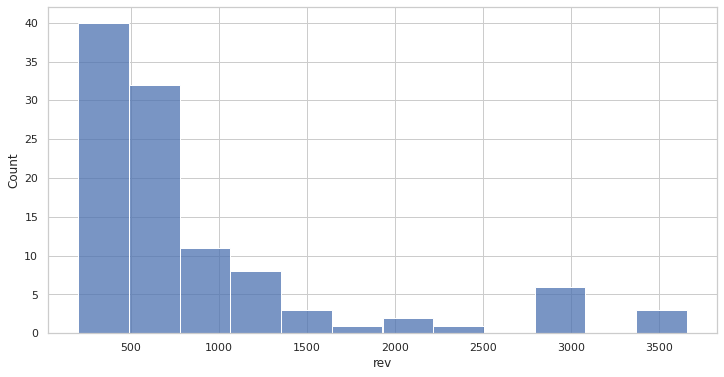

In [61]:
sns.histplot(control_group.rev, kde=False)

Экспериментальная группа

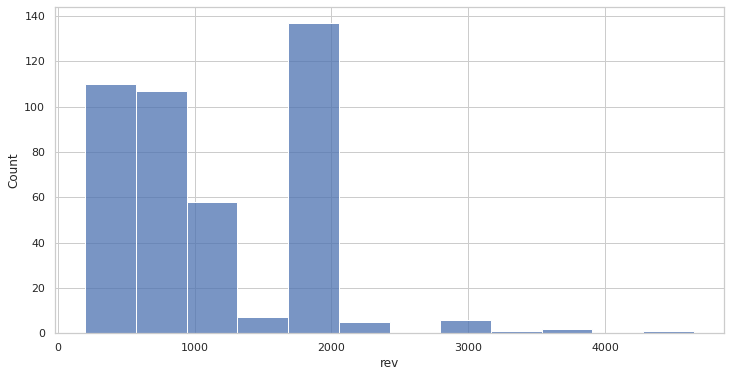

In [62]:
sns.histplot(experimental_group.rev, kde=False)

Контрольная группа активных пользователей

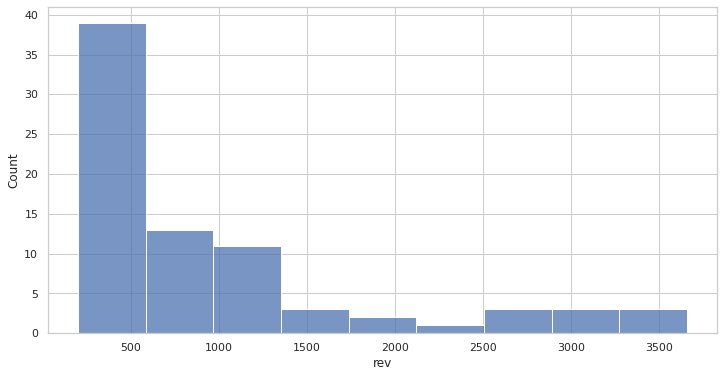

In [63]:
sns.histplot(control_group_active.rev, kde=False)

Экспериментальная группа активных пользователей

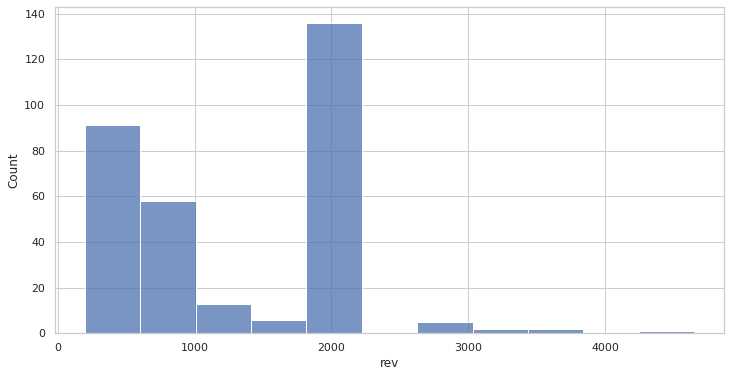

In [64]:
sns.histplot(experimental_group_active.rev, kde=False)

*Судя по графикам, распределения отличаются от нормальных. Протестируем распределения на нормальность тестом Шапиро-Уилка*

In [65]:
stats.shapiro(control_group.rev)

ShapiroResult(statistic=0.7196124196052551, pvalue=5.321687643507211e-13)

In [66]:
stats.shapiro(experimental_group.rev)

ShapiroResult(statistic=0.8672363758087158, pvalue=8.947892893418603e-19)

In [67]:
stats.shapiro(control_group_active.rev)

ShapiroResult(statistic=0.7353236079216003, pvalue=1.4986822893803264e-10)

In [68]:
stats.shapiro(experimental_group_active.rev)

ShapiroResult(statistic=0.8547235727310181, pvalue=1.5437024585965894e-16)

*Здесь на основании значения p-value стремящимся к нулю, мы можем сделать вывод, что распределения отклоняются от нормальных.*

Дополнительно проведем тесты для логарифмов выборок

In [69]:
stats.shapiro(np.log(control_group_active.rev))

ShapiroResult(statistic=0.9057686924934387, pvalue=2.680935176613275e-05)

In [70]:
stats.shapiro(np.log(experimental_group_active.rev))

ShapiroResult(statistic=0.8419413566589355, pvalue=2.9242029102554055e-17)

*Все выборки значимо отклоняются от нормальных, поэтому для сравнения пар выборок между собой (выборочных средних) вместо T-теста лучше обратиться к непараметрическим аналогам, например к тесту Манна-Уитни*

Тест Манна-Уитни на всех пользователях

In [71]:
stat, p = mannwhitneyu(control_group.rev, experimental_group.rev)

In [72]:
print('Statistics=%.3f, p=%.9f' % (stat, p))

Statistics=17862.000, p=0.000193161


Тест Манна-Уитни на активных пользователях

In [73]:
stat, p = mannwhitneyu(control_group_active.rev, experimental_group_active.rev)

In [74]:
print('Statistics=%.3f, p=%.9f' % (stat, p))

Statistics=9001.000, p=0.000251139


*Тесты показали наличие статистически значимых различий между активными пользователями контрольной и тестовой групп. p=0.00025 дает достаточные основания для отклонения нулевой гипотезы.*

Рассчитаем 95% доверительные интервалы для оценок выборок пользователей

In [75]:
a = control_group_active.rev

In [76]:
st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))

(726.1769657624474, 1141.0025214170398)

In [77]:
a = experimental_group_active.rev

In [78]:
st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))

(1170.06418320263, 1345.693800873803)

*Как мы видим, доверительные интервалы наших выборочных средних не пересекаются, следовательно, у нас есть дополнительные основания для отклонения нулевой гипотезы.*

Проиллюстрируем доверительные интервалы на графике

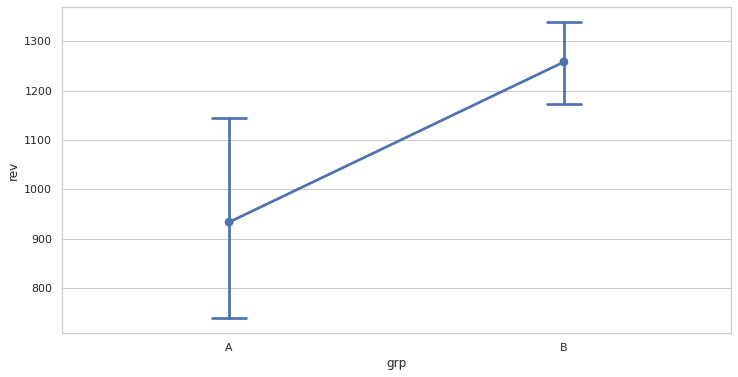

In [79]:
sns.pointplot(x='grp', y='rev', data=df_groups[df_groups.is_active == 'active'].query('rev != 0'), capsize=0.1)

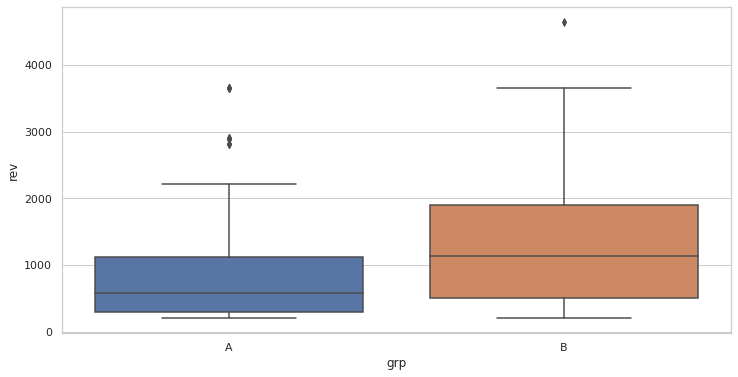

In [80]:
sns.boxplot(x='grp', y='rev', data=df_groups[(df_groups.is_active == 'active') & (df_groups.rev != 0)])

Квантили распределения

In [81]:
quintiles_control = control_group_active.rev.quantile([.2, .4, .6, .8]).to_dict()

In [82]:
quintiles_control

{0.2: 290.0, 0.4: 470.80000000000007, 0.6: 690.0, 0.8: 1172.0}

In [83]:
quintiles_experimental = experimental_group_active.rev.quantile([.2, .4, .6, .8]).to_dict()

In [84]:
quintiles_experimental

{0.2: 290.0, 0.4: 846.0000000000001, 0.6: 1900.0, 0.8: 1900.0}

In [85]:
metrics_df

,grp,ARPU,ARPPU,ARPU_active,ARPPU_active,CR,CR_active
0,A,6.268019,860.710280,47.347204,933.589744,0.728238,5.071521
1,B,8.036171,1108.824893,58.058798,1257.878992,0.724747,4.615611


## Выводы

В результате эксперимента метрика ARPU активных пользователей выросла с 47,3 до 58,1 (на 22,6%), ARPPU активных пользователей выросла с 933,6 до 1257,9 (на 34,7%), при этом CR снизился на 8,9%. Возможно, это может быть связано с особенностями механик оплат, например оплата производится пользователем без входа на сайт. В целом, наблюдается существенный рост метрик ARPU и ARPPU доверительные интервалы выборочных средних не пересекаются, активные покупатели в тестовой группе стали тратить существенно больше денег на сайте. p-value для групп активных пользователей составил 0.00025. 

Таким образом, мы отклоняем нулевую гипотезу и применяем новую механику на всех пользователей, т.к. средняя сумма оплат услуг сайта статистически значимо изменилась. ARPU и ARPPU в тестовой группе выше чем в контрольной.

# Задание 2. SQL

## 2.1 Очень усердные ученики

In [86]:
import pandahouse as ph

In [87]:
connection_default = {'host': 'http://clickhouse.beslan.pro:8080',
                      'database':'default',
                      'user':'student', 
                      'password':'dpo_python_2020'
                     }

In [88]:
connection_test = dict(database='test',
                  host='http://clickhouse.beslan.pro:8080',
                  user='student-rw',
                  password='656e2b0c9c')

Так как в нашей базе данных данные представлен только 2 дня октября (30.10.2021 и 31.10.2021), будем селектить только октябрь. 

In [89]:
query_1 = '''
        SELECT 
            count(*) AS stud_count
        FROM   
            (
            SELECT 
                st_id,
                count() AS count_id
            FROM 
                default.peas
            WHERE 
                correct = 1 AND
                toStartOfMonth(timest) = '2021-10-01'
            GROUP BY 
                st_id  
            HAVING 
                count_id >= 20
            )
        '''

In [90]:
result = ph.read_clickhouse(query=query_1, connection=connection_default)
result

,stud_count
0,136


## 2.2 Оптимизация воронки

Создадим промежуточные таблицы при помощи блока WITH

In [91]:
query_2 = '''
    WITH 
        total_table AS 
        (
        SELECT 
            l.st_id as st_id,
            l.test_grp as test_grp,
            r.timest as timest,
            r.correct as correct,
            r.subject as subject
        FROM 
            default.studs as l 
        LEFT JOIN   
            default.peas as r  
            ON   
                l.st_id = r.st_id 
        ), 

        total_buys AS 
        (
        SELECT 
            l.st_id AS st_id,
            l.money AS money,
            l.subject AS subject,
            r.test_grp AS test_grp
        FROM   
            default.final_project_check AS l   
        LEFT JOIN   
            default.studs AS r
            ON 
                l.st_id = r.st_id
        ),

        (
            SELECT sum(money)  
            FROM total_buys
            WHERE test_grp = 'pilot'
        ) AS total_profit_pilot,

        (
            SELECT sum(money)  
            FROM total_buys
            WHERE test_grp = 'control'
        ) AS total_profit_control,

        (
            SELECT uniqExact(st_id) 
            FROM total_buys
            WHERE test_grp = 'pilot'
        ) AS buyers_pilot,

        (
            SELECT uniqExact(st_id) 
            FROM total_buys
            WHERE test_grp = 'control'
        ) AS buyers_control,

        (
            SELECT uniqExact(st_id) 
            FROM total_table
            WHERE test_grp = 'pilot'
        ) AS all_users_pilot,

        (
            SELECT uniqExact(st_id) 
            FROM total_table
            WHERE test_grp = 'control'
        ) AS all_users_control,

        active_users AS 
        (
            SELECT st_id, test_grp
            FROM total_table  
            WHERE correct = 1
            GROUP BY st_id, test_grp
            HAVING count(st_id) >= 10
        ),

        active_buyers AS  
        (
            SELECT 
                DISTINCT st_id,
                test_grp
            FROM   
                total_buys
            WHERE   
                st_id IN 
                    (SELECT st_id 
                     FROM active_users)
        ),

        active_math_users AS  
        (
            SELECT 
                st_id,
                test_grp
            FROM 
                total_table  
            WHERE   
                    correct = 1
                AND subject = 'Math'
            GROUP BY
                st_id,
                test_grp
            HAVING  
                count(st_id) >= 2
        ),

        math_buyers AS   
        (
            SELECT 
                st_id,
                test_grp
            FROM   
                total_buys
            WHERE   
                subject = 'Math'
                AND st_id IN 
                    (SELECT st_id 
                     FROM active_math_users)
        )

    SELECT 
        total_profit_pilot / all_users_pilot AS ARPU_pilot,
        total_profit_control / all_users_control AS ARPU_control,
        total_profit_pilot / buyers_pilot AS ARPAU_pilot,
        total_profit_control / buyers_control AS ARPAU_control,
        buyers_pilot / all_users_pilot AS CR_pilot,
        buyers_control / all_users_control AS CR_control,
        
        (SELECT count(DISTINCT st_id)
         FROM active_buyers
         WHERE test_grp = 'pilot')
         /
         (SELECT count(DISTINCT st_id)
         FROM active_users
         WHERE test_grp = 'pilot'
         ) AS CR_active_pilot,
            
        (SELECT count(DISTINCT st_id)
         FROM active_buyers
         WHERE test_grp = 'control')
         /
         (SELECT count(DISTINCT st_id)
         FROM active_users
         WHERE test_grp = 'control'
         ) AS CR_active_control,
            
        (SELECT count(DISTINCT st_id)
         FROM math_buyers
         WHERE test_grp = 'pilot')
         /
         (SELECT count(DISTINCT st_id)
         FROM active_math_users
         WHERE test_grp = 'pilot'
         ) AS CR_math_pilot,
            
        (SELECT count(DISTINCT st_id)
         FROM math_buyers
         WHERE test_grp = 'control')
         /
         (SELECT count(DISTINCT st_id)
         FROM active_math_users
         WHERE test_grp = 'control'
         ) AS CR_math_control
    '''
    

In [92]:
result_2 = ph.read_clickhouse(query=query_2, connection=connection_default)
result_2

,ARPU_pilot,ARPU_control,ARPAU_pilot,ARPAU_control,CR_pilot,CR_control,CR_active_pilot,CR_active_control,CR_math_pilot,CR_math_control
0,11508.474576,4540.983607,106093.75,92333.333333,0.108475,0.04918,0.247525,0.106061,0.095238,0.061224


# Задание 3. Python

### Функция для подгрузки данных

Функция принимает на вход датафрейм с 3-мя столбцами, который подгружается к существующему датафрейму groups со столбцами ['id', 'grp', 'rev']. Заголовки дополнительного датафрейма могут отличаться. Функция рассчитывает классические метрики CR, ARPU, ARPPU и возвращает датафрейм. 

In [93]:
def add_file(new_file):
    groups_add = pd.read_csv(new_file)
    groups_add = groups_add.rename(columns={groups_add.columns[0]: 'id', 
                                            groups_add.columns[1]:'grp', 
                                            groups_add.columns[2]:'rev'})
    
    global groups
    groups = groups.append(groups_add)
    
    group_obj = groups.groupby('grp', as_index=False)
    group_obj_buys = groups.query('rev != 0').groupby('grp', as_index=False)
    ARPU = group_obj.agg({'rev': 'mean'}).rename(columns={'rev': 'ARPU'})
    ARPPU = group_obj_buys.agg({'rev': 'mean'}).rename(columns={'rev': 'ARPPU'})
    CR = (group_obj_buys.count().id / group_obj.count().id).values
    
    metrics_df = ARPU.merge(ARPPU, on='grp')
    metrics_df['CR'] = CR
    
    return metrics_df   

Для тестирования, создадим новые датафреймы

In [94]:
groups = df_groups.drop(columns=['is_active'])
groups

,id,grp,rev
0,1489,B,0.0
1,1627,A,990.0
2,1768,B,0.0
3,1783,B,0.0
4,1794,A,0.0
...,...,...,...
74571,200247820,B,0.0
74572,201032527,B,0.0
74573,201067612,B,0.0
74574,201067653,B,0.0


In [95]:
df0 = pd.DataFrame({'col1': [1221001, 5011101, 7000001, 6011001, 6001112, 6011103, 6000456, 6000879, 6000888], 
                   'col2': ['A', 'B', 'A', 'A', 'B', 'B', 'A', 'A', 'B'], 
                   'col3': [30, 40.0, 0, 1000., 225, 15488, 1015, 20111, 0]})
df0

,col1,col2,col3
0,1221001,A,30.0
1,5011101,B,40.0
2,7000001,A,0.0
3,6011001,A,1000.0
4,6001112,B,225.0
5,6011103,B,15488.0
6,6000456,A,1015.0
7,6000879,A,20111.0
8,6000888,B,0.0


In [96]:
df = pd.DataFrame({'col1': [1221000, 5000000, 6000000, 6000001, 6000002, 6000003, 6000004, 6000005, 6000006], 
                   'col2': ['A', 'B', 'A', 'A', 'B', 'B', 'A', 'A', 'B'], 
                   'col3': [3000, 400.0, 0, 10000., 220255, 154088, 10215, 201111, 0]})
df

,col1,col2,col3
0,1221000,A,3000.0
1,5000000,B,400.0
2,6000000,A,0.0
3,6000001,A,10000.0
4,6000002,B,220255.0
5,6000003,B,154088.0
6,6000004,A,10215.0
7,6000005,A,201111.0
8,6000006,B,0.0


In [97]:
test0 = df0.to_csv('groups_add1.csv', index=False)

In [98]:
metrics = add_file('groups_add1.csv')
metrics

,grp,ARPU,ARPPU,CR
0,A,7.773302,1029.297297,0.007552
1,B,8.298679,1137.260878,0.007297


In [99]:
test = df.to_csv('groups_add2.csv', index=False)

In [100]:
metrics1 = add_file('groups_add2.csv')
metrics1

,grp,ARPU,ARPPU,CR
0,A,23.027817,2944.156522,0.007822
1,B,14.555209,1981.195463,0.007347


In [101]:
metrics.append(metrics1)

,grp,ARPU,ARPPU,CR
0,A,7.773302,1029.297297,0.007552
1,B,8.298679,1137.260878,0.007297
0,A,23.027817,2944.156522,0.007822
1,B,14.555209,1981.195463,0.007347


### Функция для построения графиков

In [103]:
def visualize(data):
    names1 = data.grp.values[0], data.grp.values[1],
    size1 = data.ARPU.values
    
    fig = plt.figure()
    fig.patch.set_facecolor('black')
 
    plt.rcParams['text.color'] = 'white'
 
    my_circle=plt.Circle( (0,0), 0.7, color='black')
 
    plt.pie(size1, labels=names1)
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.show()
 
    names2 = data.grp.values[0], data.grp.values[1],
    size2 = data.ARPPU.values
    
    fig = plt.figure()
    fig.patch.set_facecolor('black')
 
    plt.rcParams['text.color'] = 'white'
 
    my_circle=plt.Circle( (0,0), 0.7, color='black')
 
    plt.pie(size2, labels=names2)
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.show()
    
    names3 = data.grp.values[0], data.grp.values[1],
    size3 = data.CR.values
    
    fig = plt.figure()
    fig.patch.set_facecolor('black')
 
    plt.rcParams['text.color'] = 'white'
 
    my_circle=plt.Circle( (0,0), 0.7, color='black')
 
    plt.pie(size3, labels=names3)
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.show()

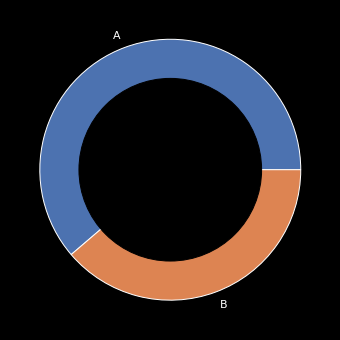

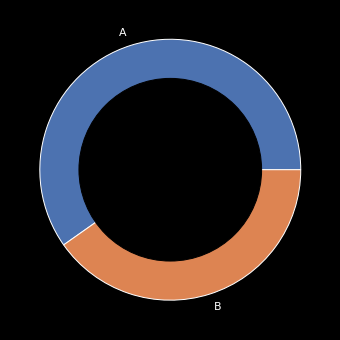

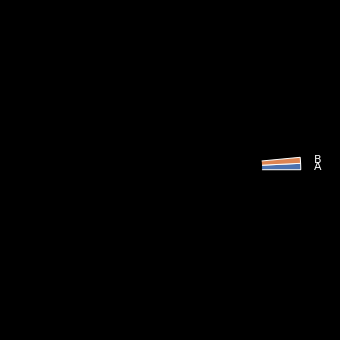

In [583]:
visualize(metrics)